In [106]:
import pandas as pd

loan_result = pd.read_csv('C:/Users/ytnal/Desktop/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/loan_result.csv')

In [107]:
log_data = pd.read_csv('C:/Users/ytnal/Desktop/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/log_data.csv')

In [108]:
user_spec = pd.read_csv('C:/Users/ytnal/Desktop/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/user_spec.csv')

In [43]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


## 3. 태어난 일자

In [94]:
# 나이 변환

user_spec['age'] = 2022 - user_spec['birth_year']

In [95]:
user_spec['birth_year'].isna().sum()

# 태어난 일자와 성별이 결측치인 데이터가 12000개나 존재(테스트 데이터에도 존재)
# 날짜와 성별이 안들어간 버전의 모델도 따로 만들어서 예측하면 될듯?

12961

In [96]:
# 나중에 생일과 성별이 없는 데이터를 대상으로 한 모델을 따로 만들어서 이 데이터에 대해 예측하면 됨

user_spec_nobirth = user_spec[user_spec['birth_year'].isna()]

In [97]:
user_spec = user_spec[user_spec['birth_year'].isna()==False].reset_index()

In [98]:
from tqdm import tqdm

def grouping(list):
    group = []
    for i in tqdm(range(len(list))):
        if list[i] >= 90:
            group.append('90대')
        elif list[i] >= 80:
            group.append('80대')
        elif list[i] >= 70:
            group.append('70대')
        elif list[i] >= 60:
            group.append('60대')
        elif list[i] >= 50:
            group.append('50대')
        elif list[i] >= 40:
            group.append('40대')
        elif list[i] >= 30:
            group.append('30대')
        elif list[i] >= 20:
            group.append('20대')
        else:
            group.append('10대')
    
    return group

In [99]:
# 나이 그룹화

user_spec['age_group'] = grouping(user_spec['age'])

100%|█████████████████████████████████████████████████████████████████████| 1381255/1381255 [00:26<00:00, 51301.68it/s]


In [100]:
user_spec['age_group'].value_counts()

30대    457490
40대    385731
20대    309216
50대    169691
60대     48806
70대      7150
10대      2254
80대       889
90대        28
Name: age_group, dtype: int64

## 6. 신용점수

In [101]:
user_spec.credit_score.isna().sum()

103397

In [102]:
# 신용점수가 결측치인 값은 어떻게 처리할까? 0이 맞을 거 같은데

In [46]:
user_spec['credit_score'].describe()

count    1.277858e+06
mean     6.382957e+02
std      1.246385e+02
min      6.000000e+01
25%      5.700000e+02
50%      6.200000e+02
75%      6.900000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

In [47]:
# 신용등급 분류

from tqdm import tqdm

def credit_group(list):
    group_list = []
    for i in tqdm(range(len(list))):
        if list[i] >= 942:
            group_list.append('1등급')
        elif list[i] >= 891:
            group_list.append('2등급')
        elif list[i] >= 832:
            group_list.append('3등급')
        elif list[i] >= 768:
            group_list.append('4등급')
        elif list[i] >= 698:
            group_list.append('5등급')
        elif list[i] >= 630:
            group_list.append('6등급')
        elif list[i] >= 530:
            group_list.append('7등급')
        elif list[i] >= 454:
            group_list.append('8등급')
        elif list[i] >= 335:
            group_list.append('9등급')
        else:
            group_list.append('10등급')
    
    return group_list

In [48]:
user_spec['credit_group'] = credit_group(user_spec.credit_score)

100%|█████████████████████████████████████████████████████████████████████| 1381255/1381255 [00:26<00:00, 51767.23it/s]


In [49]:
user_spec.credit_group.value_counts()

7등급     553060
6등급     292440
5등급     139551
10등급    123714
8등급      90573
4등급      70376
3등급      42178
2등급      31719
1등급      27498
9등급      10146
Name: credit_group, dtype: int64

In [50]:
user_spec = pd.concat([user_spec, pd.get_dummies(user_spec.credit_group, drop_first=True)], axis=1)

## 7. 연소득

In [51]:
user_spec['yearly_income']

0          108000000.0
1           30000000.0
2           30000000.0
3           62000000.0
4           36000000.0
              ...     
1381250     25000000.0
1381251     20000000.0
1381252     75000000.0
1381253     50000000.0
1381254     35000000.0
Name: yearly_income, Length: 1381255, dtype: float64

In [52]:
import numpy as np

np.log(user_spec.yearly_income)

C:\Users\ytnal\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          18.497642
1          17.216708
2          17.216708
3          17.942645
4          17.399029
             ...    
1381250    17.034386
1381251    16.811243
1381252    18.132999
1381253    17.727534
1381254    17.370859
Name: yearly_income, Length: 1381255, dtype: float64

In [53]:
user_spec = user_spec[user_spec.yearly_income.isna() == False]

In [54]:
user_spec.yearly_income.isna().sum()

0

-------

아래는 자료변환 과정에 따라 달라질 수 있는 내용

In [55]:
import pandas as pd

np.array(user_spec['yearly_income']).reshape(-1, 1)

array([[1.08e+08],
       [3.00e+07],
       [3.00e+07],
       ...,
       [7.50e+07],
       [5.00e+07],
       [3.50e+07]])

In [56]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(np.array(user_spec.yearly_income).reshape(-1, 1))

# 훈련 데이터 스케일링
X_train_scaled = robust_scaler.transform(np.array(user_spec.yearly_income).reshape(-1, 1))


(-3.0, 6.0)

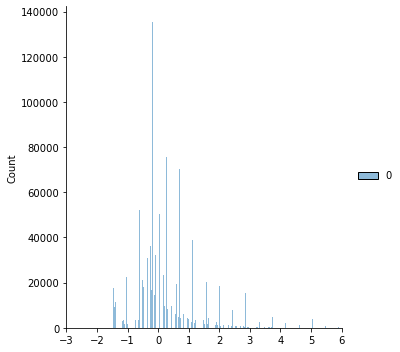

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(X_train_scaled)
plt.xlim([-3, 6])

In [115]:
# 0에 로그를 씌우면 값을 계산할 수 없음(음의 무한대). 그래서 결측치로 바꿔줌

for i in tqdm(range(len(user_spec.yearly_income))):
    if user_spec.yearly_income[i] == 0:
        user_spec.yearly_income[i] = np.nan

user_spec['log_income'] = np.log(user_spec.yearly_income)

100%|████████████████████████████████████████████████████████████████████| 1394216/1394216 [00:12<00:00, 114145.57it/s]


In [113]:
# plot 그리기 위해 0을 결측치로 처리해줬는데 음의 무한대를 어떻게 해줘야할지 모르겠다..
# 실

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,age_group,credit_gruop,credit_group,log_income
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,NaN,OTHERINCOME,NaN,기타,...,기타,0.0,NaN,NaN,NaN,28.0,20대,1,1,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,NaN,PRIVATEBUSINESS,20220301.0,기타,...,생활비,0.0,0.0,NaN,NaN,24.0,20대,10,10,NaN
403,1367736,754871,1989.0,1.0,2022-03-06 16:13:52,700.0,NaN,EARNEDINCOME,202107.0,정규직,...,생활비,NaN,NaN,3.0,37000000.0,33.0,30대,5,5,NaN
409,486110,155247,1970.0,1.0,2022-03-06 18:29:52,930.0,NaN,OTHERINCOME,NaN,기타,...,생활비,NaN,NaN,4.0,70000000.0,52.0,50대,2,2,NaN
433,1162413,69770,2001.0,1.0,2022-03-29 10:17:25,650.0,NaN,OTHERINCOME,NaN,기타,...,생활비,NaN,NaN,NaN,NaN,21.0,20대,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393892,1168646,376368,1988.0,0.0,2022-06-26 16:26:13,600.0,NaN,FREELANCER,20211126.0,기타,...,생활비,0.0,NaN,NaN,NaN,34.0,30대,7,7,NaN
1393898,1762801,792309,2001.0,1.0,2022-06-26 10:56:22,NaN,NaN,OTHERINCOME,NaN,기타,...,생활비,0.0,0.0,NaN,NaN,21.0,20대,10,10,NaN
1393919,749451,828176,1994.0,1.0,2022-06-26 02:14:10,690.0,NaN,OTHERINCOME,NaN,기타,...,생활비,0.0,NaN,3.0,9000000.0,28.0,20대,6,6,NaN
1393925,724590,250369,1967.0,1.0,2022-06-26 10:37:22,940.0,NaN,OTHERINCOME,NaN,기타,...,투자,0.0,NaN,NaN,NaN,55.0,50대,2,2,NaN


C:\Users\ytnal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_income', ylabel='Density'>

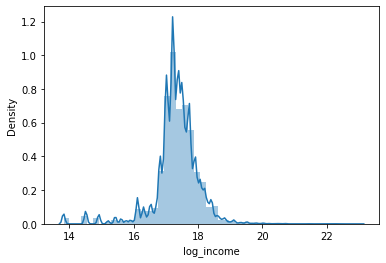

In [116]:
import numpy as np


sns.distplot(user_spec.log_income)

## 8. 근로형태

In [57]:
import pandas as pd

user_spec = pd.concat([user_spec, pd.get_dummies(user_spec.income_type, drop_first=True)], axis=1)

In [58]:
user_spec.income_type.isna().sum()

0

In [59]:
user_spec

,index,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,...,5등급,6등급,7등급,8등급,9등급,EARNEDINCOME2,FREELANCER,OTHERINCOME,PRACTITIONER,PRIVATEBUSINESS
0,0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,...,0,1,0,0,0,0,0,0,0,1
1,1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,...,0,0,0,0,0,0,0,0,0,1
2,2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,...,1,0,0,0,0,0,1,0,0,0
3,3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,...,0,0,0,0,0,0,0,0,0,0
4,4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381250,1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,...,0,0,1,0,0,0,1,0,0,0
1381251,1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,...,0,0,0,0,0,0,0,1,0,0
1381252,1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,...,1,0,0,0,0,0,0,0,0,0
1381253,1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,...,0,1,0,0,0,0,0,0,0,0


## 10. 고용형태

In [60]:
user_spec.employment_type.isna().sum()

0

In [61]:
user_spec = pd.concat([user_spec, pd.get_dummies(user_spec.employment_type, drop_first=True)], axis=1)

In [62]:
user_spec

,index,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,...,8등급,9등급,EARNEDINCOME2,FREELANCER,OTHERINCOME,PRACTITIONER,PRIVATEBUSINESS,기타,일용직,정규직
0,0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,...,0,0,0,0,0,0,1,1,0,0
1,1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,...,0,0,0,0,0,0,1,0,0,1
2,2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,...,0,0,0,1,0,0,0,1,0,0
3,3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,...,0,0,0,0,0,0,0,0,0,1
4,4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381250,1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,...,0,0,0,1,0,0,0,1,0,0
1381251,1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,...,0,0,0,0,1,0,0,1,0,0
1381252,1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,...,0,0,0,0,0,0,0,0,0,1
1381253,1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,...,0,0,0,0,0,0,0,0,0,1


## 11. 주거소유형태

In [63]:
user_spec['houseown_type'].isna().sum()

0

In [64]:
user_spec.houseown_type.value_counts()

전월세       636990
기타가족소유    461193
자가        281083
배우자         1901
Name: houseown_type, dtype: int64

In [65]:
user_spec = pd.concat([user_spec, pd.get_dummies(user_spec.houseown_type, drop_first=True)], axis=1)

In [66]:
user_spec

,index,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,...,FREELANCER,OTHERINCOME,PRACTITIONER,PRIVATEBUSINESS,기타,일용직,정규직,배우자,자가,전월세
0,0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,...,0,0,0,1,1,0,0,0,1,0
1,1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,...,0,0,0,1,0,0,1,0,0,0
2,2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,...,1,0,0,0,1,0,0,0,0,0
3,3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,...,0,0,0,0,0,0,1,0,1,0
4,4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381250,1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,...,1,0,0,0,1,0,0,0,0,0
1381251,1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,...,0,1,0,0,1,0,0,0,1,0
1381252,1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,...,0,0,0,0,0,0,1,0,1,0
1381253,1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,...,0,0,0,0,0,0,1,0,1,0


## 12. 대출희망금액

In [67]:
user_spec['desired_amount'].isna().sum()

0

In [68]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(np.array(user_spec.desired_amount).reshape(-1, 1))

# 훈련 데이터 스케일링
X_train_scaled = robust_scaler.transform(np.array(user_spec.yearly_income).reshape(-1, 1))

C:\Users\ytnal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

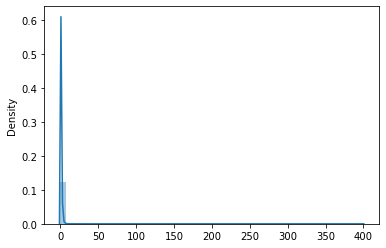

In [70]:
import seaborn as sns

sns.distplot(X_train_scaled)
plt.xlim([-3, 5])

이렇게 변환된 값으로 해도 될 것 같은데?

## 13. 대출목적

In [ ]:
user_spec.purpose.isna().sum()

In [ ]:
user_spec = pd.concat([user_spec, pd.get_dummies(user_spec.purpose, drop_first=True)], axis=1)

In [ ]:
user_spec

## 17. 기대출금액

In [87]:
user_spec['existing_loan_amt'].isna().sum()

307615

In [78]:
user_spec[user_spec.existing_loan_amt == 0]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,LIVING,SWITCHLOAN,기타,대환대출,사업자금,생활비,자동차구입,전월세보증금,주택구입,투자
260,1017019,18097,1960.0,0.0,2022-04-24 12:00:47,710.0,20000000.0,OTHERINCOME,NaN,기타,...,0,0,0,0,0,1,0,0,0,0
587,269835,589393,1992.0,1.0,2022-06-07 19:53:20,810.0,42000000.0,EARNEDINCOME2,20211001.0,정규직,...,0,0,0,0,0,1,0,0,0,0
612,328000,858992,1994.0,1.0,2022-06-07 21:49:23,610.0,1000000.0,PRACTITIONER,20211101.0,기타,...,0,0,0,1,0,0,0,0,0,0
704,12473,427113,1975.0,1.0,2022-03-19 05:55:16,700.0,10000000.0,OTHERINCOME,NaN,기타,...,0,0,0,0,0,1,0,0,0,0
778,622314,75657,1985.0,1.0,2022-05-05 22:13:23,870.0,25000000.0,EARNEDINCOME,202103.0,정규직,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392108,350852,581140,1995.0,0.0,2022-05-15 16:58:29,830.0,32000000.0,EARNEDINCOME,201507.0,정규직,...,0,0,0,0,0,1,0,0,0,0
1392228,438755,485949,2001.0,1.0,2022-04-12 01:08:44,740.0,3000000.0,FREELANCER,202111.0,기타,...,0,0,1,0,0,0,0,0,0,0
1392782,740632,181154,1995.0,1.0,2022-06-14 10:28:20,470.0,24000000.0,OTHERINCOME,NaN,기타,...,0,0,0,0,0,1,0,0,0,0
1393665,1551678,340274,1964.0,1.0,2022-04-18 16:02:27,620.0,30000000.0,EARNEDINCOME2,202201.0,정규직,...,0,0,0,0,0,1,0,0,0,0


# EDA

In [74]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381167 entries, 0 to 1381254
Data columns (total 41 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   index                                1381167 non-null  int64  
 1   application_id                       1381167 non-null  int64  
 2   user_id                              1381167 non-null  int64  
 3   birth_year                           1381167 non-null  float64
 4   gender                               1381167 non-null  float64
 5   insert_time                          1381167 non-null  object 
 6   credit_score                         1277774 non-null  float64
 7   yearly_income                        1381167 non-null  float64
 8   income_type                          1381167 non-null  object 
 9   company_enter_month                  1212448 non-null  float64
 10  employment_type                      1381167 non-null  object 
 11

In [88]:
data = user_spec.drop(['birth_year', 'insert_time', 'income_type', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn'
                , 'existing_loan_cnt'], axis=1)

data = data.drop(['index', 'application_id', 'user_id', 'gender', 'company_enter_month', '1등급', '2등급', '3등급', '4등급', '5등급', '6등급'
          , '7등급', '8등급', '9등급', 'EARNEDINCOME2', 'FREELANCER', 'OTHERINCOME', 'PRACTITIONER', 'PRIVATEBUSINESS', '기타',
          '일용직', '정규직', '배우자', '자가', '전월세'], axis=1)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381167 entries, 0 to 1381254
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   credit_score       1277774 non-null  float64
 1   yearly_income      1381167 non-null  float64
 2   employment_type    1381167 non-null  object 
 3   houseown_type      1381167 non-null  object 
 4   desired_amount     1381167 non-null  float64
 5   purpose            1381167 non-null  object 
 6   existing_loan_amt  1073552 non-null  float64
 7   age                1381167 non-null  float64
 8   age_group          1381167 non-null  object 
 9   credit_group       1381167 non-null  object 
dtypes: float64(5), object(5)
memory usage: 148.2+ MB


In [90]:
data.corr()

,credit_score,yearly_income,desired_amount,existing_loan_amt,age
credit_score,1.000000,0.033918,0.075461,0.155399,0.030026
yearly_income,0.033918,1.000000,0.130715,0.112631,0.063177
desired_amount,0.075461,0.130715,1.000000,0.048232,0.022435
existing_loan_amt,0.155399,0.112631,0.048232,1.000000,0.154756
age,0.030026,0.063177,0.022435,0.154756,1.000000


In [91]:
data

,credit_score,yearly_income,employment_type,houseown_type,desired_amount,purpose,existing_loan_amt,age,age_group,credit_group
0,660.0,108000000.0,기타,자가,1000000.0,기타,162000000.0,37.0,30대,6등급
1,870.0,30000000.0,정규직,기타가족소유,30000000.0,대환대출,27000000.0,54.0,50대,3등급
2,710.0,30000000.0,기타,기타가족소유,10000000.0,생활비,15000000.0,25.0,20대,5등급
3,820.0,62000000.0,정규직,자가,2000000.0,생활비,344000000.0,33.0,30대,4등급
4,630.0,36000000.0,정규직,기타가족소유,5000000.0,생활비,16000000.0,22.0,20대,6등급
...,...,...,...,...,...,...,...,...,...,...
1381250,590.0,25000000.0,기타,기타가족소유,5000000.0,사업자금,NaN,22.0,20대,7등급
1381251,980.0,20000000.0,기타,자가,50000000.0,생활비,NaN,67.0,60대,1등급
1381252,750.0,75000000.0,정규직,자가,100000000.0,대환대출,200000000.0,39.0,30대,5등급
1381253,640.0,50000000.0,정규직,자가,10000000.0,대환대출,117000000.0,47.0,40대,6등급
